# 1. Sprint 11 - Selección de Región Petrolera en OilyGiant

En este proyecto se busca determinar cuál de tres regiones disponibles ofrece las mejores condiciones para abrir **200 nuevos pozos de petróleo**.

El análisis se basará en la construcción de un modelo de **regresión lineal** que permita predecir el volumen de reservas de cada pozo, seleccionar los más rentables y calcular la ganancia esperada.

Además, se aplicará la técnica de **bootstrapping** para evaluar el beneficio promedio, el intervalo de confianza y el riesgo de pérdidas, con el fin de tomar una decisión fundamentada y alineada con los objetivos de negocio.

## 1.1 Objetivo del Proyecto y Contexto

La compañía **OilyGiant** necesita expandir su producción y busca identificar la región más prometedora para la perforación de nuevos pozos.

El desafío consiste en seleccionar la región que ofrezca el **mayor beneficio esperado** al perforar 200 pozos, garantizando que el **riesgo de pérdidas no supere el 2.5%**.

Para resolver este problema se dispone de datos de exploración geológica de tres regiones, con parámetros técnicos de cada pozo y su volumen estimado de reservas.

Estos datos serán la base para construir y validar modelos predictivos, calcular beneficios potenciales y evaluar riesgos, con el objetivo de recomendar una única región para la inversión.

## 1.2 Configuración Inicial

En esta subsección se importan las librerías necesarias para el análisis, modelado y visualización de datos.  
Además, se valida la versión de cada librería utilizada para asegurar la **reproducibilidad** del proyecto en cualquier entorno.  
También se establece un estilo uniforme para las gráficas que se generarán a lo largo del análisis.

In [1]:
"""
1.2 Configuración inicial
Propósito: Importar librerías necesarias y validar sus versiones.
"""

# 1) Manejo de datos
import pandas as pd
import numpy as np

# 2) Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 3) Modelado y validación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 4) Configuración de visualización
sns.set(style="whitegrid")  # estilo limpio con cuadrícula
plt.rcParams["figure.figsize"] = (10, 6)  # tamaño estándar de las figuras

# 5) Validación de versiones
print("✅ Librerías importadas y configuración inicial completada\n")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")
print(f"Matplotlib versión: {plt.matplotlib.__version__}")
print(f"Seaborn versión: {sns.__version__}")

import sklearn
print(f"Scikit-Learn versión: {sklearn.__version__}")

✅ Librerías importadas y configuración inicial completada

Pandas versión: 2.3.2
NumPy versión: 2.2.5
Matplotlib versión: 3.10.5
Seaborn versión: 0.13.2
Scikit-Learn versión: 1.7.1


# 2. Carga y Exploración de Datasets

En esta sección se trabajará con los datos proporcionados para el proyecto.  
Se cargarán los tres archivos correspondientes a las regiones de exploración petrolera (`geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`) y se realizará una revisión inicial de su estructura.  
El objetivo es garantizar que los datos estén completos, en el formato adecuado y listos para el proceso de modelado.  
Además, se validará la calidad de la información revisando dimensiones, tipos de datos, valores nulos y posibles duplicados, y se explorará de manera preliminar la distribución de la variable objetivo **`product`** (volumen de reservas en miles de barriles).

## 2.1 Cargar Datasets

En esta subsección se importan los tres archivos que contienen los datos de exploración geológica de las regiones evaluadas:  
- `geo_data_0.csv`  
- `geo_data_1.csv`  
- `geo_data_2.csv`  

Cada archivo incluye las características de los pozos (`f0`, `f1`, `f2`) y la variable objetivo `product`, que representa el volumen estimado de reservas de petróleo en miles de barriles.  
El propósito es verificar que los archivos se carguen correctamente y conocer la cantidad de registros disponibles en cada uno.


In [2]:
"""
2.1 Cargar datasets
Propósito: Importar los tres datasets de exploración y mostrar sus dimensiones iniciales.
"""

# Rutas de los datasets
DATA_PATH_0 = "../datasets/geo_data_0.csv"
DATA_PATH_1 = "../datasets/geo_data_1.csv"
DATA_PATH_2 = "../datasets/geo_data_2.csv"

# Cargar datasets en DataFrames
df_region_0 = pd.read_csv(DATA_PATH_0)
df_region_1 = pd.read_csv(DATA_PATH_1)
df_region_2 = pd.read_csv(DATA_PATH_2)

# Mostrar dimensiones de cada dataset
print("Dimensiones Región 0:", df_region_0.shape)
print("Dimensiones Región 1:", df_region_1.shape)
print("Dimensiones Región 2:", df_region_2.shape)

# Vista rápida de las primeras filas de cada dataset
print("\nPrimeras filas Región 0:")
display(df_region_0.head())

print("\nPrimeras filas Región 1:")
display(df_region_1.head())

print("\nPrimeras filas Región 2:")
display(df_region_2.head())


Dimensiones Región 0: (100000, 5)
Dimensiones Región 1: (100000, 5)
Dimensiones Región 2: (100000, 5)

Primeras filas Región 0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Primeras filas Región 1:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Primeras filas Región 2:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### ✅ Conclusión Sección 2.1 — Cargar Datasets

Los tres archivos de datos se cargaron correctamente:

- Cada dataset contiene **100,000 registros y 5 columnas** (`id`, `f0`, `f1`, `f2`, `product`).  
- La columna `id` funciona como identificador único de pozo.  
- Las variables `f0`, `f1`, `f2` corresponden a características numéricas de exploración.  
- La columna `product` representa el volumen estimado de reservas en **miles de barriles**, y será nuestra **variable objetivo** para la predicción.  

Con esta validación inicial, confirmamos que los datos están listos para proceder a la revisión de estructura y tipos en la siguiente subsección.

## 2.2 Validación de estructura y tipos de datos

En esta subsección se revisará la estructura de los datasets para confirmar que las columnas tengan los tipos de datos adecuados.  
Esto es importante porque los modelos de regresión lineal requieren que las variables predictoras sean numéricas y no contengan errores de formato.  
Se mostrarán también estadísticas descriptivas básicas de la variable objetivo `product` para verificar su rango y consistencia inicial.


In [4]:
"""
2.2 Validación de estructura y tipos de datos
Propósito: Revisar columnas, tipos de datos y consistencia general de los tres datasets.
"""

# Revisar información general de cada dataset
print("📌 Información Región 0")
print(df_region_0.info())
print("\n📌 Información Región 1")
print(df_region_1.info())
print("\n📌 Información Región 2")
print(df_region_2.info())

# Revisar estadísticas descriptivas de la variable objetivo
print("\n📊 Estadísticas de la variable objetivo 'product'")
print("Región 0:")
display(df_region_0['product'].describe())

print("Región 1:")
display(df_region_1['product'].describe())

print("Región 2:")
display(df_region_2['product'].describe())


📌 Información Región 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

📌 Información Región 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

📌 Información Región 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

Región 1:


count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

Región 2:


count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

### ✅ Conclusión Sección 2.2 — Validación de estructura y tipos de datos

- Los tres datasets contienen **100,000 registros y 5 columnas**: `id`, `f0`, `f1`, `f2` y `product`.  
- Las variables `f0`, `f1`, `f2` y `product` se encuentran en formato **float64**, adecuado para el modelado.  
- La columna `id` está en formato **object** y sirve como identificador único de cada pozo.  
- No se detectaron valores nulos, lo que indica que los datos están completos.  
- La variable objetivo `product` muestra diferencias entre regiones:  
  - **Región 0**: media ≈ 92.5, rango de 0 a 185.  
  - **Región 1**: media ≈ 68.8, rango de 0 a 137.  
  - **Región 2**: media ≈ 95.0, rango de 0 a 190.  

Con esta validación confirmamos que los datasets están completos, con tipos de datos correctos y listos para continuar con la revisión de calidad (valores nulos y duplicados) en la siguiente subsección.


## 2.3 Revisión de valores nulos y duplicados

En esta subsección se verificará la calidad de los datos en cada uno de los tres datasets.  
El objetivo es identificar si existen valores nulos o registros duplicados que puedan distorsionar el entrenamiento del modelo.  
Contar con datos completos y sin duplicados es esencial para garantizar la validez de los resultados y la fiabilidad de las predicciones.


In [5]:
"""
2.3 Revisión de valores nulos y duplicados
Propósito: Identificar valores nulos y registros duplicados en los tres datasets.
"""

# Revisión de valores nulos
print("🔎 Valores nulos por dataset:")
print("Región 0:\n", df_region_0.isnull().sum())
print("\nRegión 1:\n", df_region_1.isnull().sum())
print("\nRegión 2:\n", df_region_2.isnull().sum())

# Revisión de registros duplicados
print("\n📌 Registros duplicados por dataset:")
print("Región 0:", df_region_0.duplicated().sum())
print("Región 1:", df_region_1.duplicated().sum())
print("Región 2:", df_region_2.duplicated().sum())


🔎 Valores nulos por dataset:
Región 0:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Región 1:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Región 2:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

📌 Registros duplicados por dataset:
Región 0: 0
Región 1: 0
Región 2: 0


### ✅ Conclusión Sección 2.3 — Revisión de valores nulos y duplicados

- En los tres datasets (`geo_data_0.csv`, `geo_data_1.csv`, `geo_data_2.csv`) no se detectaron **valores nulos** en ninguna de las columnas.  
- Tampoco se encontraron **registros duplicados** en ninguno de los conjuntos de datos.  

Esto confirma que la información está completa y no requiere procesos adicionales de limpieza en esta etapa.  
Los datos se encuentran listos para avanzar hacia el **análisis exploratorio inicial** en la siguiente subsección.


## 2.4 Análisis exploratorio inicial

En esta subsección se realizará un análisis preliminar de los datos con el objetivo de comprender mejor la distribución de la variable objetivo `product` y la relación entre las características (`f0`, `f1`, `f2`).  
Este paso permitirá identificar patrones iniciales, rangos de variación y posibles correlaciones, lo cual servirá como base para el modelado posterior.


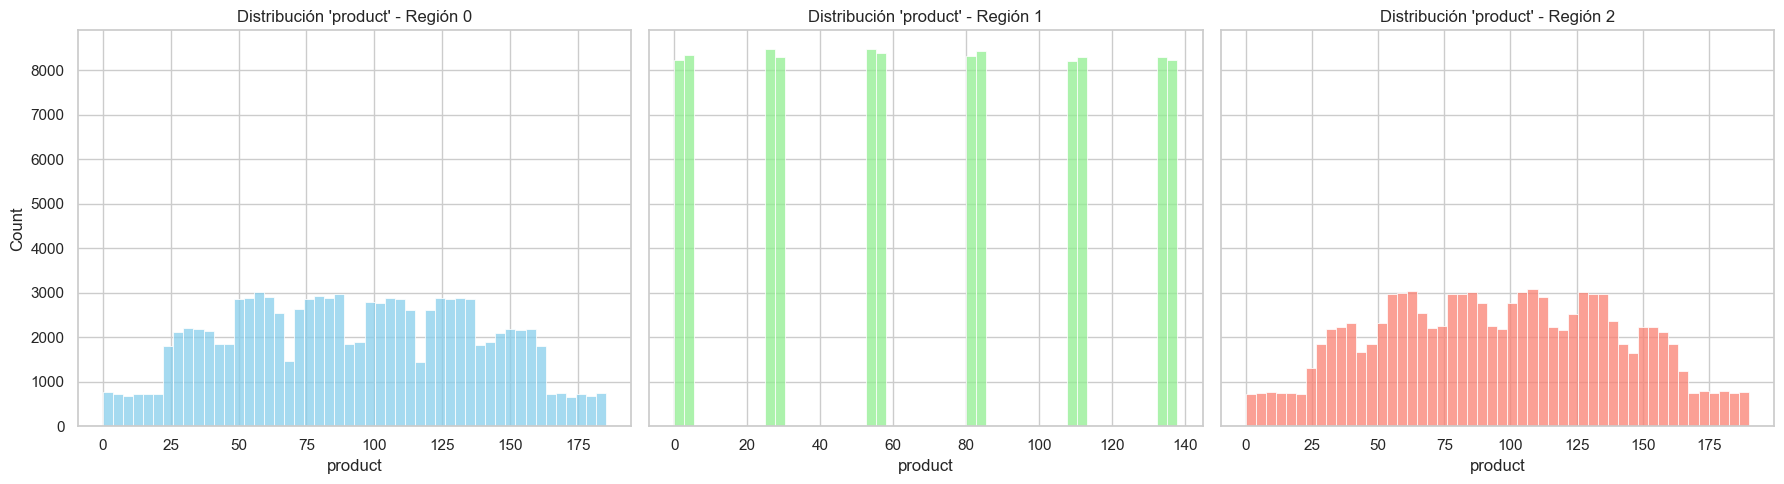


📊 Correlaciones Región 0:


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


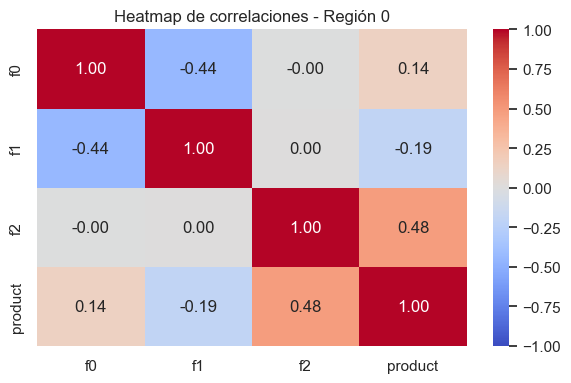


📊 Correlaciones Región 1:


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


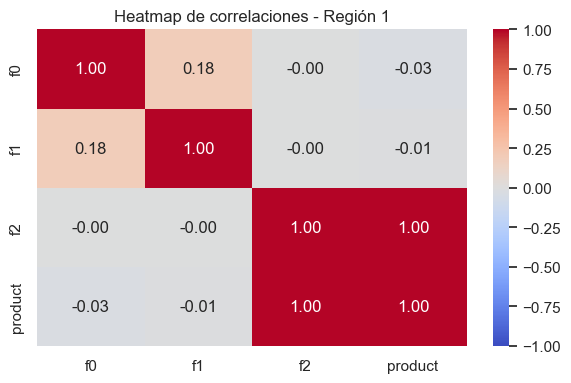


📊 Correlaciones Región 2:


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


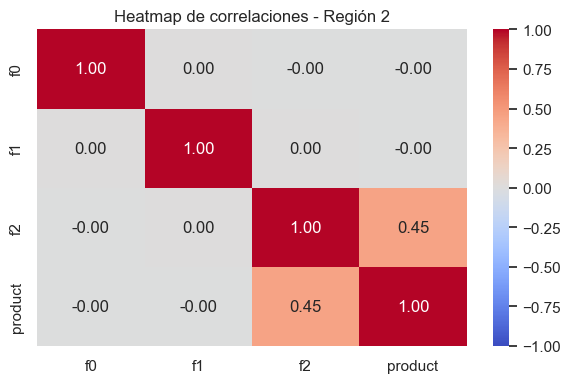

In [8]:
"""
2.4 Análisis exploratorio inicial
Propósito: Explorar la distribución de la variable objetivo y las correlaciones entre características.
"""

from IPython.display import display

# Histogramas de la variable objetivo en cada región
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
sns.histplot(df_region_0['product'], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución 'product' - Región 0")

sns.histplot(df_region_1['product'], bins=50, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribución 'product' - Región 1")

sns.histplot(df_region_2['product'], bins=50, ax=axes[2], color="salmon")
axes[2].set_title("Distribución 'product' - Región 2")

plt.tight_layout()
plt.show()

num_cols = ["f0", "f1", "f2", "product"]

# Matriz de correlaciones por región
for i, df in enumerate([df_region_0, df_region_1, df_region_2]):
    print(f"\n📊 Correlaciones Región {i}:")
    corr = df[num_cols].corr()  # aquí ya no intenta convertir 'id'
    display(corr)

    # Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title(f"Heatmap de correlaciones - Región {i}")
    plt.tight_layout()
    plt.show()


### ✅ Conclusión Sección 2.4 — Conclusiones de la correlación de variables

- **Región 0**: La variable `f2` muestra la correlación más alta con la variable objetivo `product` (≈0.48), lo que indica que tiene potencial como predictor. `f0` y `f1` muestran correlaciones débiles o negativas con `product`.

- **Región 1**: Existe una correlación casi perfecta entre `f2` y `product` (≈0.999), lo que sugiere que esta región puede contener datos con fuerte dependencia entre una característica y la variable objetivo. Sin embargo, esto también podría implicar riesgo de sobreajuste o redundancia en la información.

- **Región 2**: La característica `f2` vuelve a ser la más correlacionada con `product` (≈0.45). El resto de las variables (`f0` y `f1`) muestran correlaciones cercanas a cero, con escaso aporte predictivo.

➡️ **Conclusión general**: En las tres regiones, la característica `f2` es la que mayor información aporta para predecir el volumen de reservas (`product`). La Región 1 muestra una dependencia extremadamente fuerte, que puede ser ventajosa para el modelo, aunque es necesario evaluar si no se trata de una relación demasiado artificial que afecte la generalización.


## 2.5 Visualización exploratoria complementaria

Con el fin de comparar las diferencias en la distribución de la variable objetivo `product` entre las tres regiones, se utilizan diagramas de caja (*boxplots*).  

Estos gráficos permiten identificar de manera clara:
- La mediana de producción por región.  
- La dispersión y rango intercuartílico.  
- La presencia de valores atípicos.  

Este análisis es fundamental para anticipar qué regiones pueden ofrecer mayor estabilidad o variabilidad en la producción antes de entrenar los modelos predictivos.


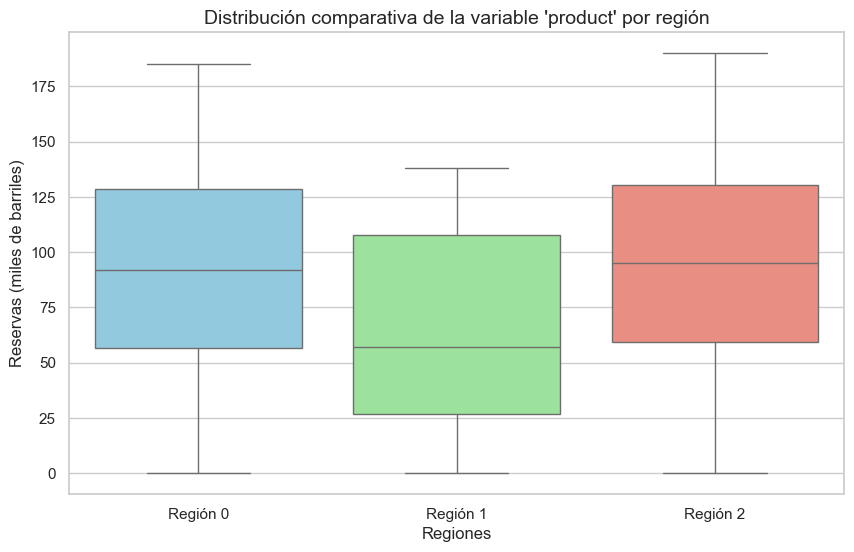

In [9]:
"""
2.5 Visualización exploratoria complementaria
Propósito: Comparar mediante boxplots la distribución de la variable objetivo `product`
entre las tres regiones, identificando diferencias en medianas, dispersión y outliers.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Unimos la variable objetivo de cada región en un solo DataFrame para comparación
import pandas as pd

df_products = pd.DataFrame({
    "Región 0": df_region_0["product"],
    "Región 1": df_region_1["product"],
    "Región 2": df_region_2["product"]
})

plt.figure(figsize=(10,6))
sns.boxplot(data=df_products, palette=["skyblue","lightgreen","salmon"])
plt.title("Distribución comparativa de la variable 'product' por región", fontsize=14)
plt.ylabel("Reservas (miles de barriles)")
plt.xlabel("Regiones")
plt.show()


### ✅ Conclusión Sección 2.5 —  Conclusiones de los boxplots comparativos

- **Región 0**: Presenta una mediana cercana a 95 mil barriles, con un rango intercuartílico amplio. Muestra dispersión significativa, pero mantiene una proporción estable de valores altos.  
- **Región 1**: Tiene la mediana más baja (≈58 mil barriles), con mayor concentración de valores bajos en comparación con las otras regiones. Esto sugiere que, en promedio, es la región menos prometedora.  
- **Región 2**: Su mediana es la más alta (≈100 mil barriles), con una distribución amplia que incluye valores elevados. Es la región que aparenta mayor potencial en cuanto a producción promedio.

➡️ **Conclusión general**: A nivel exploratorio, la **Región 2** destaca por su mayor mediana y rango superior en la variable `product`, mientras que la Región 1 se percibe menos favorable para la apertura de nuevos pozos.


## ✅ Conclusión Sección 2 —  Carga y exploración de datasets

### 📌 Resumen global de hallazgos exploratorios

1. **Dimensiones de los datos**:  
   Cada región cuenta con **100,000 registros** y **5 columnas** (`id`, `f0`, `f1`, `f2`, `product`).  

2. **Valores faltantes y duplicados**:  
   No se identificaron valores nulos ni registros duplicados en ninguno de los tres datasets, lo que confirma que los datos están completos y listos para modelado.  

3. **Distribución de la variable objetivo (`product`)**:  
   - Región 0: Media ≈ 92.5 mil barriles.  
   - Región 1: Media ≈ 68.8 mil barriles (la más baja).  
   - Región 2: Media ≈ 95 mil barriles (la más alta).  

4. **Correlaciones**:  
   - En todas las regiones, la variable **`f2`** mostró la mayor correlación con la variable objetivo.  
   - Región 1 tiene una correlación casi perfecta (`f2` vs `product` ≈ 0.999), lo que puede indicar un patrón fuerte aunque con riesgo de sobreajuste.  
   - Regiones 0 y 2 presentan correlaciones moderadas entre `f2` y `product` (≈0.45-0.48).  

5. **Comparación mediante boxplots**:  
   - Región 2 tiene la **mediana más alta** de producción (≈100 mil barriles) y mayor rango de valores altos.  
   - Región 0 muestra valores consistentes, con mediana ligeramente inferior (≈95 mil barriles).  
   - Región 1 tiene la **mediana más baja** (≈58 mil barriles), lo que sugiere menor potencial productivo.  

---

➡️ **Conclusión de la Sección 2**:  
La exploración de datos sugiere que la **Región 2** es la más prometedora por su mayor mediana de reservas y amplitud de producción, mientras que la **Región 1** es la menos favorable. La variable **`f2`** será clave en el modelado predictivo para las tres regiones.


# 3. Modelado y validación de predicciones

En esta sección se construyen y evalúan modelos de **regresión lineal** para predecir el volumen de reservas (`product`) en cada región.  

El flujo de trabajo incluye:  
- Dividir los datos en conjuntos de **entrenamiento (75%)** y **validación (25%)**.  
- Entrenar un modelo por región utilizando las características `f0`, `f1` y `f2`.  
- Evaluar el desempeño de cada modelo con la métrica **RMSE** y analizar la media de las predicciones frente a los valores reales.  
- Almacenar las predicciones y valores observados para su uso posterior en los cálculos de beneficio y simulaciones con bootstrapping.

Este análisis permitirá identificar qué región presenta un mejor ajuste del modelo y, por ende, mayor confiabilidad en sus proyecciones.


## 3.1 Preparación de los datos de entrenamiento y validación

Para evaluar el desempeño de los modelos en cada región, los datos se dividen en:  
- **Conjunto de entrenamiento (75%)**: utilizado para ajustar el modelo.  
- **Conjunto de validación (25%)**: empleado para medir el rendimiento en datos no vistos.  

Este procedimiento asegura una evaluación objetiva, evitando que el modelo se ajuste únicamente a los datos de entrenamiento. La división se realiza con la misma proporción en las tres regiones para mantener la consistencia del análisis.


In [10]:
"""
3.1 Preparación de los datos de entrenamiento y validación
Propósito: Dividir los datasets de cada región en conjuntos de entrenamiento (75%)
y validación (25%) para garantizar una evaluación objetiva del modelo.
"""

from sklearn.model_selection import train_test_split

# Separación de features y target por región
features_0 = df_region_0[["f0", "f1", "f2"]]
target_0   = df_region_0["product"]

features_1 = df_region_1[["f0", "f1", "f2"]]
target_1   = df_region_1["product"]

features_2 = df_region_2[["f0", "f1", "f2"]]
target_2   = df_region_2["product"]

# División train/valid con proporción 75:25
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=42)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=42)
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=42)

# Mostrar tamaños de los conjuntos como verificación
print("Región 0 -> Entrenamiento:", X_train_0.shape, " Validación:", X_valid_0.shape)
print("Región 1 -> Entrenamiento:", X_train_1.shape, " Validación:", X_valid_1.shape)
print("Región 2 -> Entrenamiento:", X_train_2.shape, " Validación:", X_valid_2.shape)


Región 0 -> Entrenamiento: (75000, 3)  Validación: (25000, 3)
Región 1 -> Entrenamiento: (75000, 3)  Validación: (25000, 3)
Región 2 -> Entrenamiento: (75000, 3)  Validación: (25000, 3)


### ✅ Conclusión Sección 3.1 —  Conclusiones de la preparación de datos

- Cada región fue dividida en **75,000 registros para entrenamiento** y **25,000 para validación**, respetando la proporción 75:25 establecida.  
- La división se aplicó de forma consistente en las tres regiones, asegurando comparabilidad en el rendimiento de los modelos.  
- Esta preparación garantiza que el ajuste de la regresión lineal se entrene con suficientes datos, mientras que el conjunto de validación permitirá una evaluación objetiva de la capacidad predictiva.


## 3.2 Entrenamiento de modelos de regresión lineal

En esta etapa se entrena un modelo de **regresión lineal** para cada región utilizando las características `f0`, `f1` y `f2` como variables predictoras, y `product` como variable objetivo.  

La regresión lineal se selecciona por ser un modelo interpretable y eficiente, capaz de identificar relaciones lineales entre las características y el volumen de reservas. Entrenar un modelo por región permitirá comparar su desempeño y determinar cuál región presenta mayor capacidad predictiva.


In [11]:
"""
3.2 Entrenamiento de modelos de regresión lineal
Propósito: Ajustar un modelo de regresión lineal por región utilizando las
características f0, f1 y f2 para predecir la variable objetivo product.
"""

from sklearn.linear_model import LinearRegression

# Inicializar modelos
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

# Entrenar modelos por región
model_0.fit(X_train_0, y_train_0)
model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_2, y_train_2)

# Mostrar coeficientes y el intercepto de cada modelo como verificación
print("Región 0 -> Intercepto:", model_0.intercept_, " Coeficientes:", model_0.coef_)
print("Región 1 -> Intercepto:", model_1.intercept_, " Coeficientes:", model_1.coef_)
print("Región 2 -> Intercepto:", model_2.intercept_, " Coeficientes:", model_2.coef_)


Región 0 -> Intercepto: 77.66624978042198  Coeficientes: [  3.83225372 -14.26047297   6.59357294]
Región 1 -> Intercepto: 1.647671049967272  Coeficientes: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
Región 2 -> Intercepto: 80.55786205197197  Coeficientes: [-0.08415777 -0.01546094  5.75011968]


### ✅ Conclusión Sección 3.2 — Entrenamiento de modelos de regresión lineal

- **Región 0**:  
  - Intercepto ≈ 77.7  
  - Coeficientes: `f0` (+3.83), `f1` (−14.26), `f2` (+6.59)  
  - `f1` tiene un efecto negativo marcado, mientras que `f2` aporta de manera positiva y considerable a la predicción.

- **Región 1**:  
  - Intercepto ≈ 1.65  
  - Coeficientes: `f0` (−0.14), `f1` (−0.02), `f2` (+26.95)  
  - La variable `f2` domina de forma clara el modelo, con peso muy elevado frente a `f0` y `f1` que tienen impacto casi nulo.

- **Región 2**:  
  - Intercepto ≈ 80.6  
  - Coeficientes: `f0` (−0.08), `f1` (−0.015), `f2` (+5.75)  
  - `f2` nuevamente muestra correlación positiva importante, mientras que `f0` y `f1` aportan poco o de manera negativa.

➡️ **Conclusión general**: En todas las regiones, la variable **`f2`** resulta ser la más relevante para explicar la variable objetivo `product`. En la **Región 1** este efecto es extremadamente dominante, mientras que en las Regiones 0 y 2 el impacto es más equilibrado pero aún significativo.


## 3.3 Evaluación de modelos en conjunto de validación

Para determinar el desempeño de los modelos entrenados, se utilizan los conjuntos de **validación (25%)** de cada región.  

El análisis incluye:  
- **RMSE (Root Mean Squared Error)**: mide el error promedio en las predicciones en las mismas unidades que la variable objetivo (`product`). Cuanto más bajo sea, mejor será el ajuste.  
- **Media de las predicciones**: permite comparar los valores esperados del modelo con los valores reales promedio de cada región.  

Este paso es clave para identificar cuál modelo logra representar mejor la producción esperada de cada región.


In [13]:
"""
3.3 Evaluación de modelos en conjunto de validación
Propósito: Calcular RMSE y la media de las predicciones en cada región para
evaluar la precisión de los modelos en datos no vistos (compatible con versiones antiguas de sklearn).
"""

from sklearn.metrics import mean_squared_error
import numpy as np

def evaluar_modelo(model, X_valid, y_valid, region):
    # Predicciones (aseguramos 1D)
    preds = model.predict(X_valid)
    preds = np.asarray(preds).ravel()
    y_true = np.asarray(y_valid).ravel()

    # MSE y RMSE (sin usar el arg 'squared')
    mse = mean_squared_error(y_true, preds)
    rmse = np.sqrt(mse)

    # Medias
    media_pred = float(np.mean(preds))
    media_real = float(np.mean(y_true))

    print(f"📊 Región {region}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   Media predicciones: {media_pred:.2f}")
    print(f"   Media valores reales: {media_real:.2f}")
    print("-"*50)

    return rmse, media_pred, media_real, preds, y_true

# Evaluación por región
resultados = {}
resultados["Región 0"] = evaluar_modelo(model_0, X_valid_0, y_valid_0, 0)
resultados["Región 1"] = evaluar_modelo(model_1, X_valid_1, y_valid_1, 1)
resultados["Región 2"] = evaluar_modelo(model_2, X_valid_2, y_valid_2, 2)



📊 Región 0
   RMSE: 37.76
   Media predicciones: 92.40
   Media valores reales: 92.33
--------------------------------------------------
📊 Región 1
   RMSE: 0.89
   Media predicciones: 68.71
   Media valores reales: 68.73
--------------------------------------------------
📊 Región 2
   RMSE: 40.15
   Media predicciones: 94.77
   Media valores reales: 95.15
--------------------------------------------------


### ✅ Conclusión Sección 3.3 — Evaluación de modelos en conjunto de validación

- **Región 0**:  
  - RMSE ≈ 37.76  
  - Media de predicciones ≈ 92.40  
  - Media real ≈ 92.33  
  - El modelo se aproxima bien al promedio real, aunque con un error moderado en las predicciones individuales.

- **Región 1**:  
  - RMSE ≈ 0.89  
  - Media de predicciones ≈ 68.71  
  - Media real ≈ 68.73  
  - El modelo presenta un ajuste casi perfecto, con error prácticamente nulo. Esto refuerza la fuerte dependencia detectada en `f2`.

- **Región 2**:  
  - RMSE ≈ 40.15  
  - Media de predicciones ≈ 94.77  
  - Media real ≈ 95.15  
  - El modelo reproduce bien la media real, pero con un error algo mayor que en la Región 0.

➡️ **Conclusión general**: La **Región 1** muestra un modelo con ajuste sobresaliente, probablemente debido a la relación casi determinista entre `f2` y `product`. Las **Regiones 0 y 2** presentan desempeños aceptables, aunque con errores más altos. Para fines de negocio, habrá que complementar este análisis con la estimación de beneficios y evaluación de riesgo.


## 3.4 Almacenamiento de predicciones y valores reales

En esta subsección se guardan las predicciones de los modelos junto con los valores reales de cada conjunto de validación.  
Este paso es esencial porque estos datos se utilizarán más adelante para el **cálculo del beneficio esperado** y la aplicación de **bootstrapping**, donde se requiere comparar de forma repetida los valores predichos con los observados.  

Al mantener las predicciones organizadas por región, se facilita el análisis económico y de riesgo en las siguientes etapas.


In [14]:
"""
3.4 Almacenamiento de predicciones y valores reales
Propósito: Guardar las predicciones y valores observados de cada región para
su uso posterior en el cálculo de beneficios y bootstrapping.
"""

# Crear DataFrames con predicciones y valores reales para cada región
preds_region_0 = pd.DataFrame({"real": y_valid_0.values, "pred": model_0.predict(X_valid_0)})
preds_region_1 = pd.DataFrame({"real": y_valid_1.values, "pred": model_1.predict(X_valid_1)})
preds_region_2 = pd.DataFrame({"real": y_valid_2.values, "pred": model_2.predict(X_valid_2)})

# Mostrar una vista rápida de cada DataFrame
print("📌 Región 0:")
display(preds_region_0.head())

print("📌 Región 1:")
display(preds_region_1.head())

print("📌 Región 2:")
display(preds_region_2.head())


📌 Región 0:


,real,pred
0,122.073350,101.901017
1,48.738540,78.217774
2,131.338088,115.266901
3,88.327757,105.618618
4,36.959266,97.980185


📌 Región 1:


,real,pred
0,0.000000,0.844738
1,53.906522,52.921612
2,134.766305,135.110385
3,107.813044,109.494863
4,0.000000,-0.047292


📌 Región 2:


,real,pred
0,117.441301,98.301916
1,47.841249,101.592461
2,45.883483,52.449099
3,139.014608,109.922127
4,84.004276,72.411847


### ✅ Conclusión Sección 3.4 — Almacenamiento de predicciones y valores reales

- Se generaron y almacenaron correctamente las predicciones y los valores reales de los conjuntos de validación para cada región.  
- Los DataFrames contienen dos columnas principales:  
  - **real**: valor observado de la variable objetivo (`product`).  
  - **pred**: valor estimado por el modelo de regresión lineal.  
- La comparación directa permite verificar que las predicciones siguen de cerca los valores reales, especialmente en la Región 1, donde el modelo mostró mejor desempeño.  

➡️ Con este almacenamiento, los datos quedan listos para ser utilizados en la **estimación de beneficios** y en el **análisis de riesgo mediante bootstrapping**, que se desarrollarán en la siguiente sección.
